# PIL, OPENCV
#### PIL(Python Imaging Library)
#### OpenCV(Open Source Computer Vision)
- 이미지다루기 ppt의 버전 2의 114p 참조.

In [1]:
!pip install Pillow

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

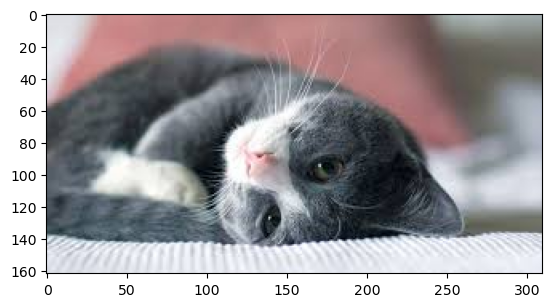

In [3]:
img = cv2.imread("../Data/cat.png")

#cv2로 읽으면 BGR 컬러로 인식되기 때문에 RGB로 컨버팅
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
np.save("../Data/image.npy", img) #numpy 배열로 이미지 저장

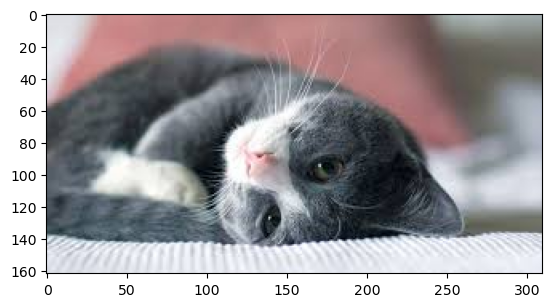

In [5]:
img_data = np.load('../Data/image.npy')
plt.imshow(img_data)
plt.show()

In [6]:
#PIL 사용하여 Image 호출
img = Image.open("../Data/cat.png").convert("L") #그레이스케일로 변환
print(img)

<PIL.Image.Image image mode=L size=310x162 at 0x21F630F1E40>


In [7]:
#numpy를 사용하여 이미지 저장 시 효율 비교
#numpy 배열로 바꾸기

img_array = np.array(img)
print(img_array)

[[222 222 222 ... 169 169 169]
 [223 223 223 ... 168 168 168]
 [223 223 223 ... 165 165 165]
 ...
 [219 219 222 ... 235 234 234]
 [221 222 224 ... 236 236 235]
 [221 222 224 ... 236 236 235]]


In [8]:
np.save('../Data/pil_image.npy', img_array)

In [9]:
img_array1 = np.load("../Data/pil_image.npy")
print(img_array1)

[[222 222 222 ... 169 169 169]
 [223 223 223 ... 168 168 168]
 [223 223 223 ... 165 165 165]
 ...
 [219 219 222 ... 235 234 234]
 [221 222 224 ... 236 236 235]
 [221 222 224 ... 236 236 235]]


In [10]:
#다시 PIL 이미지로 변환 후 저장(greyscale)

img = Image.fromarray(np.uint8(img_array1))
img.save('../Data/image_numpy.png')

In [11]:
#size 크기 확인
import os
np_save_size = os.path.getsize('../Data/pil_image.npy')
print(np_save_size, "bytes") #단위는 byte

pil_save_size = os.path.getsize('../Data/image_numpy.png')
print(pil_save_size, "bytes")#단위는 byte

50348 bytes
26808 bytes


In [12]:
#image 타입, 크기 확인 방법

image_path = '../Data/cat.png'

#image read
image = cv2.imread(image_path)

#image type
image_type = type(image)
print("이미지 타입>>", image_type)

#image 크기 확인
image_height, image_width, image_channel = image.shape
print(image_height, image_width, image_channel)

이미지 타입>> <class 'numpy.ndarray'>
162 310 3


<function matplotlib.pyplot.show(close=None, block=None)>

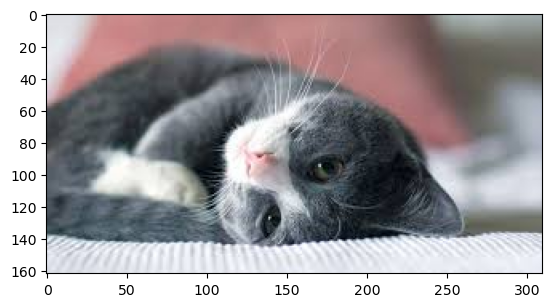

In [13]:
#이미지 확인하기
image_path = "../Data/cat.png"

image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show

244 244


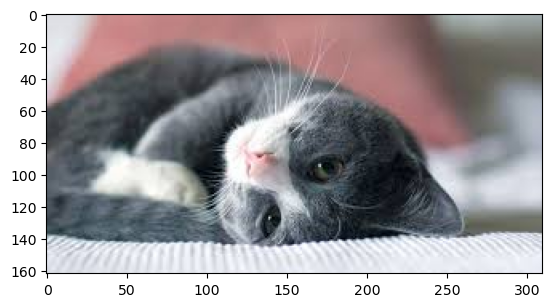

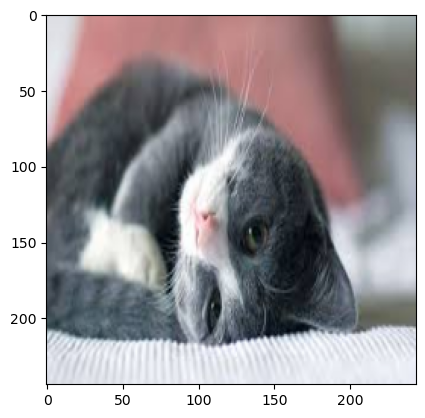

In [14]:
#image resize
image_path = '../Data/cat.png'

image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#이미지 크기 조절

image_resize = cv2.resize(image, (244,244))

#이미지 크기 확인
image_height_, image_width_, _ = image_resize.shape
print(image_height_, image_width_)

#원본 이미지
plt.imshow(image)
plt.show()

#resize 이미지
plt.imshow(image_resize)
plt.show()

In [15]:
# image 저장
image_resize = cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB) #크기변경만 했고 컨버팅을 안해서 컨버팅 진행 후 저장
cv2.imwrite('../Data/resize_image.png', image_resize)

True

In [16]:
#image crop

image_path = '../Data/cat.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

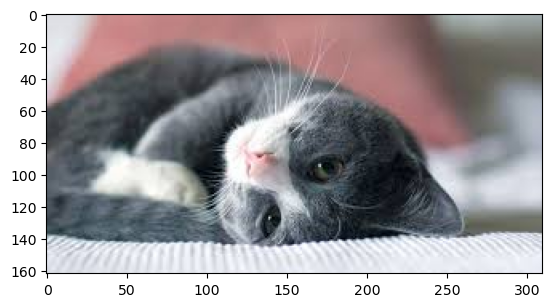

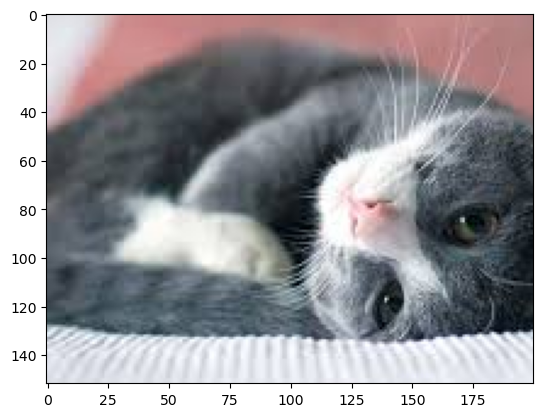

In [17]:
# image crop은 [start : end : stop]

image_cropped = image[10:,:200]
plt.imshow(image)
plt.show()

plt.imshow(image_cropped)
plt.show()

In [18]:
# image 자르기 (좌표 기준)

image_path = '../Data/cat.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

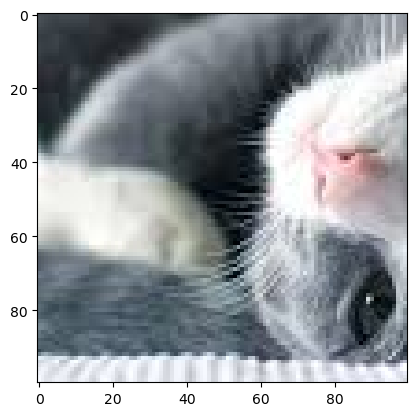

In [19]:
x1, y1 = 50, 50 #좌상단 모서리 좌표
x2, y2 = 150, 150 #우하단 모서리 좌표

cropped_image_test = image[y1:y2, x1:x2]

plt.imshow(cropped_image_test)
plt.show()

In [20]:
#image blurring

image_path = '../Data/cat.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

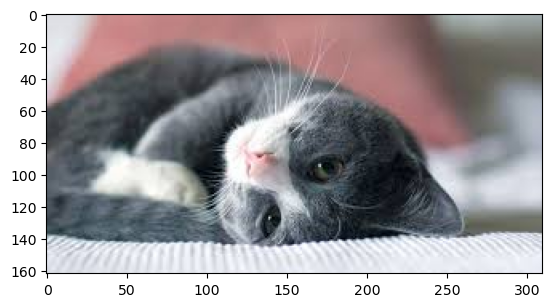

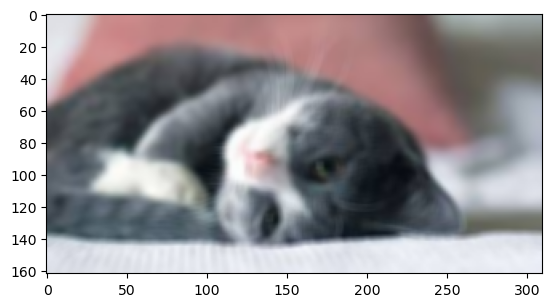

In [21]:
#blur 함수 불러오기

image_blurry = cv2.blur(image, (5,5)) #(이미지 파일, 커널), 커널이 커질수록 더 흐려진다.

plt.imshow(image)
plt.show()

plt.imshow(image_blurry)
plt.show()

In [22]:
#filter2D method 사용해보기

image_path = '../Data/cat.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [23]:
kernel = np.ones((10,10)) / 80.0 # 모두 더하면 1이 되도록 정규화
print(kernel)

[[0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]]


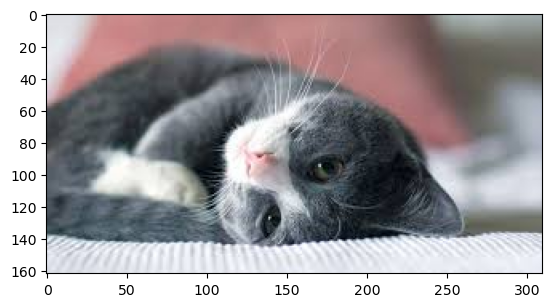

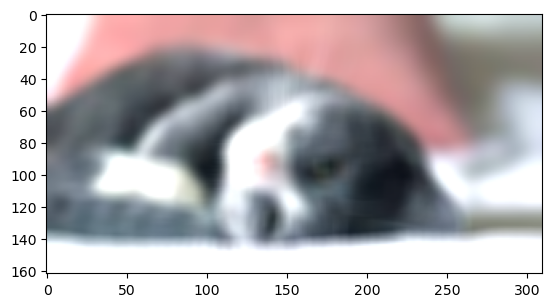

In [24]:
image_kernel = cv2.filter2D(image, -1, kernel)

plt.imshow(image)
plt.show()

plt.imshow(image_kernel)
plt.show()

In [25]:
# Gaussian Blur

image_path = "../Data/cat.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

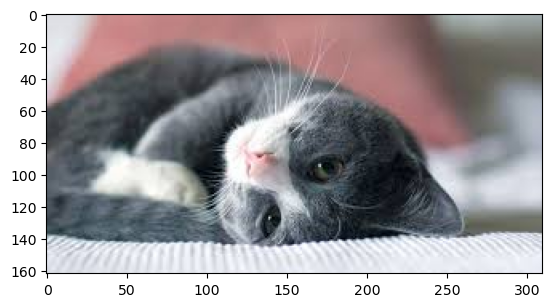

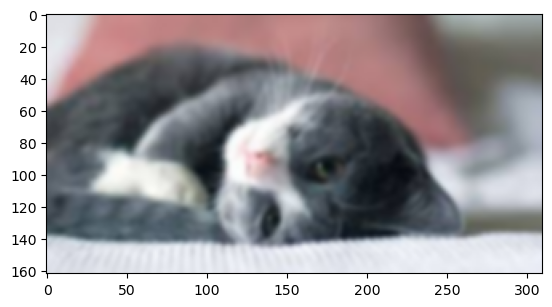

In [26]:
image_g = cv2.GaussianBlur(image, (7,7), 0)

plt.imshow(image)
plt.show()

plt.imshow(image_g)
plt.show()

In [27]:
#image 선명하게 하기.

image_path = "../Data/cat.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

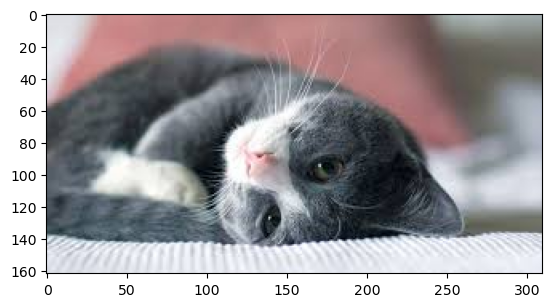

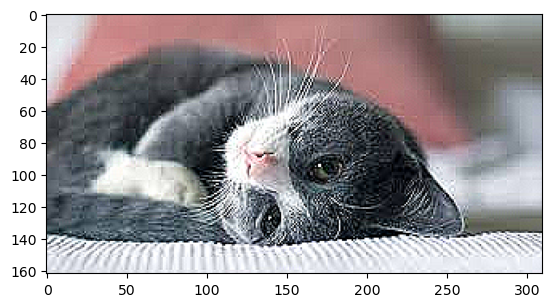

In [28]:
kernel_ = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]
                    ])
image_sharp = cv2.filter2D(image, -1, kernel_)

plt.imshow(image)
plt.show()

plt.imshow(image_sharp)
plt.show()

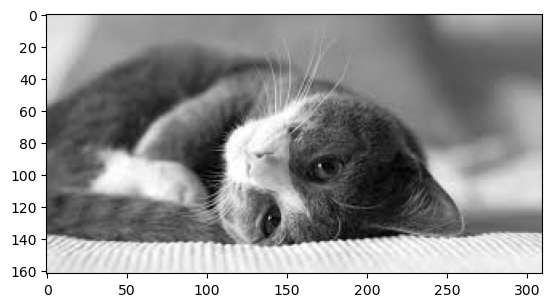

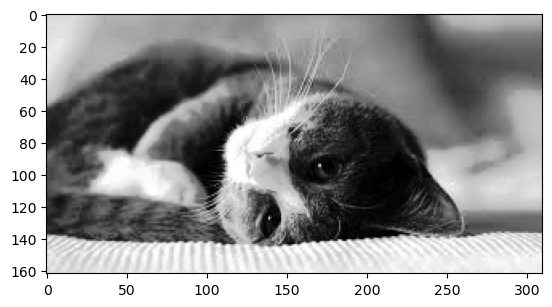

In [29]:
#이미지 대비 높이기
#히스토그램 평활화, equalizeHist method (gray image만 가능)

image_path = "../Data/cat.png"
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_enhanced = cv2.equalizeHist(image_gray)

plt.imshow(image_gray, 'gray') #gray 꼭 명시해주기.
plt.show()

plt.imshow(image_enhanced, 'gray')
plt.show()

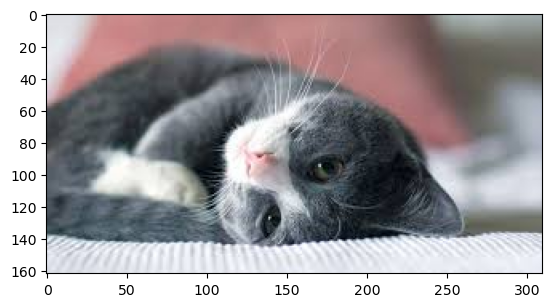

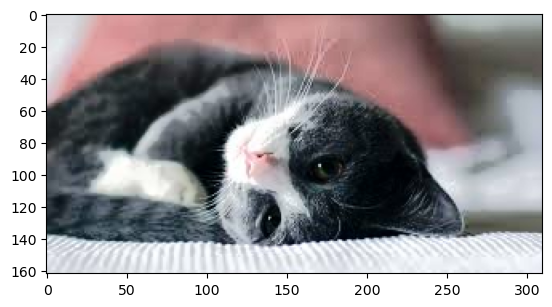

In [30]:
#color image로 equalizeHist 사용하기.

image_path = '../Data/cat.png'
image = cv2.imread(image_path)

#RGB로 변경
image_org = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#YUV 타입으로 변경
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

#히스토그램 평활화 적용
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

#YUV -> RGB로 변환.
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(image_org)
plt.show()

plt.imshow(image_rgb)
plt.show()

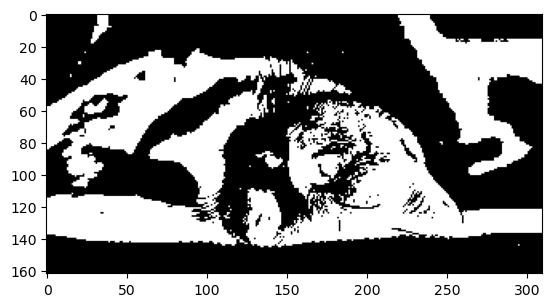

In [31]:
# 이미지 이진화(grayscale에서만 가능.)

image_path = '../Data/cat.png'
image = cv2.imread(image_path)

image_gray_01 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#image 이진화
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_gray_01,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV,
                                        neighborhood_size,
                                        subtract_from_mean)

plt.imshow(image_binarized, 'gray')
plt.show()

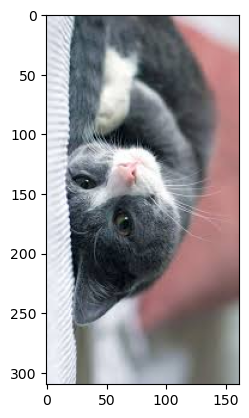

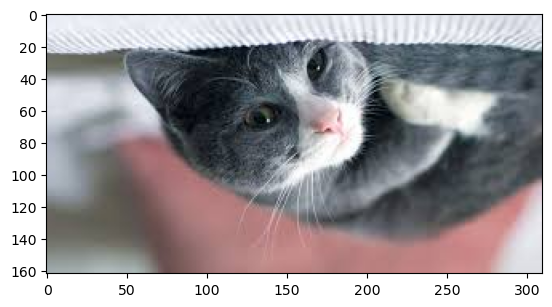

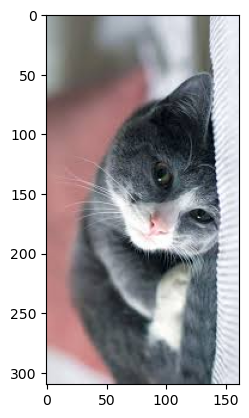

In [35]:
#이미지 회전

image_path = '../Data/cat.png'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) #시계방향 90도
image_180 = cv2.rotate(image, cv2.ROTATE_180)
image_270 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(image_90)
plt.show()

plt.imshow(image_180)
plt.show()

plt.imshow(image_270)
plt.show()

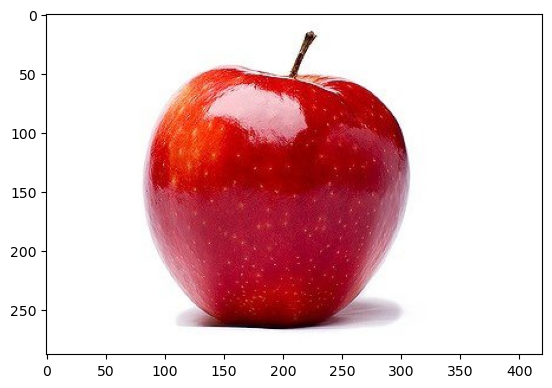

In [44]:
# 배경 제거
image_path = '../Data/apple.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

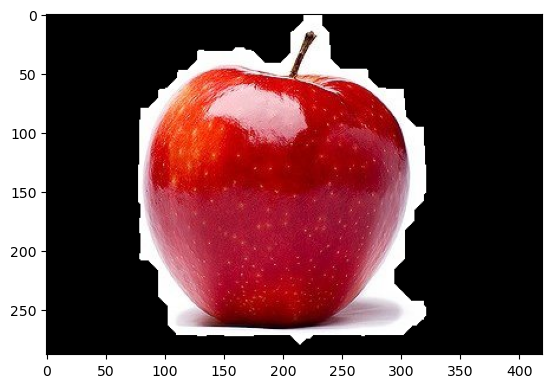

In [43]:
rectangle = (0, 0, 399, 1000) #(시작 지점), xy의 넓이, 너비

#초기 마스크 생성

mask = np.zeros(image.shape[:2], np.uint8)

#grabCut에 사용할 임시 배열 생성

bgModel = np.zeros((1,65), np.float64)
fgModel = np.zeros((1,65), np.float64)

# grabCut 실행
cv2.grabCut(image, mask, rectangle, bgModel, fgModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

image_rgb_nobg = image * mask2[:, :, np.newaxis]

plt.imshow(image_rgb_nobg)
plt.show()

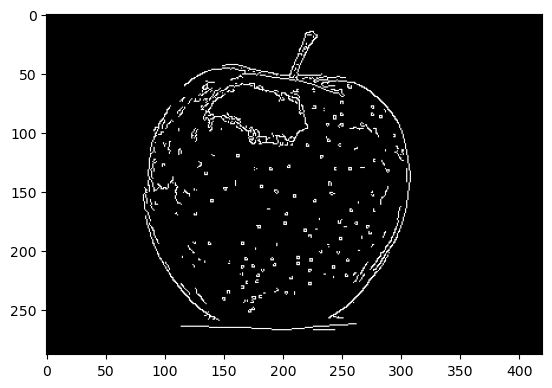

In [46]:
# 경계선 감지하기.

image_path = '../Data/apple.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#픽셀 강도의 중간값을 계산하기
median_intensity = np.median(image)

# 2. 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임계값으로 지정
lower_threshold = int(max(0, (1.0 - 0.44) * median_intensity))
# 이 식에서는 0.33을 중간 강도에서 뺀 후, 0과의 최댓값을 취합니다. 이렇게 함으로써 중간 강도의 44% 아래 값을 하한값으로 설정합니다. 
# 하한값은 0 미만으로 설정되지 않도록 하기 위한 것입니다.
upper_threshold = int(min(255, (1.0 + 0.44) * median_intensity))
# 이 식에서는 0.33을 중간 강도에서 뺀 후, 255과의 최소값을 취합니다. 이렇게 함으로써 중간 강도의 44% 아래 값을 상한값으로 설정합니다. 
# 상한값은 255 초과 x

#canny edge 적용하기.
image_canny = cv2.Canny(image, lower_threshold, upper_threshold)

plt.imshow(image_canny, 'gray')
plt.show()

In [48]:
#모서리 찾기(grayscale 필수.)

image = cv2.imread('../Data/box.png')

1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.1017794699263157e+34
1.101779469

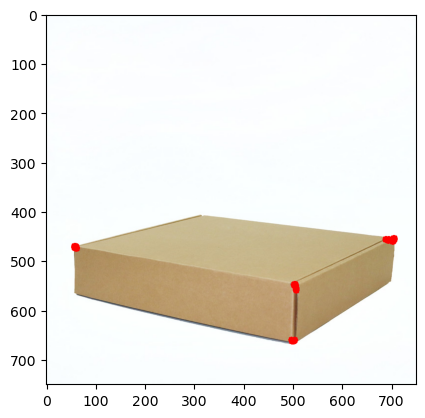

In [55]:
image_gray = cv2.imread('../Data/box.png', cv2.IMREAD_GRAYSCALE)
image_gray = np.float32(image_gray)

#모서리 감지 매개변수 설정
block_size = 4
aperture = 29
free_parameter = 0.04

detector_responses = cv2.cornerHarris(image_gray,
                                     block_size,
                                     aperture,
                                     free_parameter)
detector_responses = cv2.dilate(detector_responses, None) #모서리 표시를 부각시키기 위한 함수

#임계값보다 크면 남기고, 나머지는 버리는 형태
threshold = 0.01
for i in range(detector_responses.shape[0]):
    for j in range(detector_responses.shape[1]):
        if detector_responses[i, j] > threshold * detector_responses.max():
            print(threshold * detector_responses.max())
            cv2.circle(image, [j, i], radius = 5, color = (0,0,255), thickness = -1)
            
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

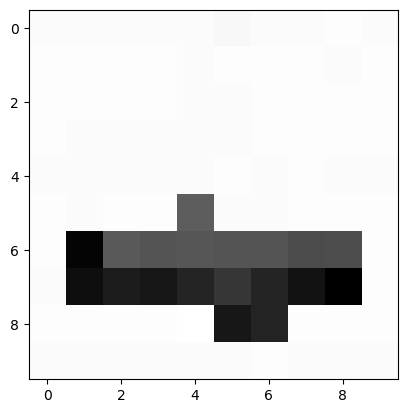

In [56]:
#flatten

image_path = '../Data/box.png'
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image_10x10 = cv2.resize(image_gray, (10,10)) #10x10 이미지로 리사이즈
image_10x10.flatten()

plt.imshow(image_10x10,'gray')
plt.show() #인공지능이 알아보는 형태로 변환이 됨.

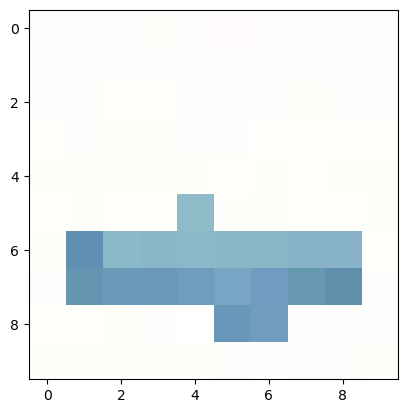

In [58]:
#color image flatten

image_color = cv2.imread('../Data/cat.png')
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_10x10_temp = cv2.resize(image_color, (10,10))
image_10x10_temp.flatten()

plt.imshow(image_10x10_temp)
plt.show()

In [59]:
# 평균 색을 특성으로 인코딩하기.

image_path = '../Data/cat.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#평균색 특성 인코딩
channels = cv2.mean(image)
print(channels) # R, G, B의 평균값.

(138.98134209478295, 133.2246714456392, 137.49121863799283, 0.0)
